In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(argparser))) # command line arguments
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # plot patchwork
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(grid))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file



source("../../utils/figure_themes.r")

## single cell predictions 

In [2]:
CELL_TYPE = "PBMC"

In [3]:
# define main_df_path
main_df_path = paste0("../results/", CELL_TYPE, "/","single_cell_predictions.parquet")

# read in data
main_df = arrow::read_parquet(main_df_path)
main_df
unique(main_df$comparison)

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
media_ctr_0.0_0_Media_ctr_0.0_0,149.1707,550.4639,Control,1.7325947402,0.24647533,-0.64079073,O04,7,215,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_blue_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_crop_cell_0.png
DMSO_0.100_%_DMSO_1.000_%,643.4014,1612.0340,Control,1.7325936947,-0.38779869,-0.38499656,O12,1,337,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure

[1] "control_pyroptosis"   "apoptosis_control"    "apoptosis_pyroptosis"

In [4]:
# split the df by comparison
control_pyroptosis <- main_df %>% filter(comparison == "control_pyroptosis")    
apoptosis_control <- main_df %>% filter(comparison == "apoptosis_control")
apoptosis_pyroptosis <- main_df %>% filter(comparison == "apoptosis_pyroptosis")
length((control_pyroptosis$comparison))
length((apoptosis_control$comparison))
length((apoptosis_pyroptosis$comparison))

[1] 17

[1] 18

[1] 18

In [5]:
main_df

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
media_ctr_0.0_0_Media_ctr_0.0_0,149.1707,550.4639,Control,1.7325947402,0.24647533,-0.64079073,O04,7,215,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_blue_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_crop_cell_0.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_crop_cell_0.png
DMSO_0.100_%_DMSO_1.000_%,643.4014,1612.0340,Control,1.7325936947,-0.38779869,-0.38499656,O12,1,337,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell_2.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure

In [6]:
# define empty dictionary
dict_of_features = {}
dict_of_groups = {}
dict_of_all = {}

In [7]:
width <- 2
height <- 2
options(repr.plot.width = width, repr.plot.height = height)
# define function to return the image object
get_image <- function(df, i){
    # Load the PNG file
    img <- png::readPNG(df$image_compsite_crop_path[i])
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()  # Remove axes and labels

    # Print the plot
    return(p)
}


#add titlecontrol_pyroptosis
add_title <- function(plot, title){
    plot + ggtitle(title) + theme(plot.title = element_text(size = 14, hjust = 0.5))
}

In [8]:
# split the feature column into separate columns
control_pyroptosis <- control_pyroptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
control_pyroptosis$channel_learned <- dplyr::recode(control_pyroptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
# split the feature column into separate columns
apoptosis_control <- apoptosis_control %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
apoptosis_control$channel_learned <- dplyr::recode(apoptosis_control$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


# split the feature column into separate columns
apoptosis_pyroptosis <- apoptosis_pyroptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
apoptosis_pyroptosis$channel_learned <- dplyr::recode(apoptosis_pyroptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 18 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18].”


In [9]:
# change the text in the dfs
control_pyroptosis$comparison <- "Control vs. Pyroptosis"
apoptosis_control$comparison <- "Apoptosis vs. Control"
apoptosis_pyroptosis$comparison <- "Apoptosis vs. Pyroptosis"

### Pyroptosis vs Control features

In [10]:
# select rows to keep in the df by index
rows_to_keep = c(5,10,12)
control_pyroptosis = control_pyroptosis[rows_to_keep,]

In [11]:
# loop through the rows of the df and plot the images
list_of_plots_control_pyroptosis <- c()
for (i in 1:nrow(control_pyroptosis)){
    list_of_plots_control_pyroptosis[[i]] <- get_image(control_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_control_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_control_pyroptosis,
    title = (
        paste0(control_pyroptosis$comparison, "\n", 
        control_pyroptosis$group, "\n", 
        control_pyroptosis$compartment, "\n",
        control_pyroptosis$feature_group, "\n",
        control_pyroptosis$measurement, "\n",
        control_pyroptosis$channel_cleaned
        
        )))

### Apoptosis vs Control features

In [12]:
# select rows to keep in the df by index
rows_to_keep = c(3,9,13)
apoptosis_control = apoptosis_control[rows_to_keep,]

In [13]:
# loop through the rows of the df and plot the images
list_of_plots_apoptosis_control <- c()
for (i in 1:nrow(apoptosis_control)){
    list_of_plots_apoptosis_control[[i]] <- get_image(apoptosis_control, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_control <- Map(
    add_title,
    plot = list_of_plots_apoptosis_control,
    title = (
        paste0(apoptosis_control$comparison, "\n", 
        apoptosis_control$group, "\n", 
        apoptosis_control$compartment, "\n",
        apoptosis_control$feature_group, "\n",
        apoptosis_control$measurement        
        )))


In [14]:
apoptosis_pyroptosis__control <- apoptosis_pyroptosis %>% filter(group == "Control")
apoptosis_pyroptosis__pyroptosis <- apoptosis_pyroptosis %>% filter(group == "Pyroptosis")
apoptosis_pyroptosis__apoptosis <- apoptosis_pyroptosis %>% filter(group == "Apoptosis")

control_pyroptosis__control <- control_pyroptosis %>% filter(group == "Control")
control_pyroptosis__pyroptosis <- control_pyroptosis %>% filter(group == "Pyroptosis")
control_pyroptosis__apoptosis <- control_pyroptosis %>% filter(group == "Apoptosis")

apoptosis_control__control <- apoptosis_control %>% filter(group == "Control")
apoptosis_control__pyroptosis <- apoptosis_control %>% filter(group == "Pyroptosis")
apoptosis_control__apoptosis <- apoptosis_control %>% filter(group == "Apoptosis")


In [15]:
# apoptosis_pyroptosis__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6]
# apoptosis_pyroptosis__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6]
# apoptosis_pyroptosis__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[3]

# control_pyroptosis__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[5]
# control_pyroptosis__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6]
# control_pyroptosis__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[1]

# apoptosis_control__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[5]
# apoptosis_control__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6]
# apoptosis_control__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[1]


# # make a df of the values 
# df_values <- data.frame(
#     comparison = c(
#         "Pyroptosis vs. Apoptosis",
#         "Pyroptosis vs. Apoptosis",
#         "Pyroptosis vs. Apoptosis",
#         "Control vs. Pyroptosis",
#         "Control vs. Pyroptosis",
#         "Control vs. Pyroptosis",
#         "Control vs. Apoptosis",
#         "Control vs. Apoptosis",
#         "Control vs. Apoptosis"
#         ),
#     group = c(
#         "Control",
#         "Apoptosis",
#         "Pyroptosis",
#         "Control",
#         "Apoptosis",
#         "Pyroptosis",
#         "Control",
#         "Apoptosis",
#         "Pyroptosis"
#     ),
#     value = c(
#         apoptosis_pyroptosis__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6],
#         apoptosis_pyroptosis__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6],
#         apoptosis_pyroptosis__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[3],

#         control_pyroptosis__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[5],
#         control_pyroptosis__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6],
#         control_pyroptosis__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[1],

#         apoptosis_control__control$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[5],
#         apoptosis_control__apoptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[6],
#         apoptosis_control__pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[1]
#     )
# )

# # save the df
# write.csv(df_values, "../results/features_values.csv", row.names = FALSE)
# head(df_values)

### Apoptosis vs Pyroptosis features

In [16]:
list_of_plots_apoptosis_pyroptosis <- c()
for (i in 1:nrow(apoptosis_pyroptosis)){
    list_of_plots_apoptosis_pyroptosis[[i]] <- get_image(apoptosis_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_apoptosis_pyroptosis,
    title = (
        paste0(apoptosis_pyroptosis$comparison, "\n", 
        apoptosis_pyroptosis$group, "\n", 
        apoptosis_pyroptosis$compartment, "\n",
        apoptosis_pyroptosis$feature_group, "\n",
        apoptosis_pyroptosis$measurement, "\n",
        apoptosis_pyroptosis$channel_cleaned
        
        )))

length(ggplot_objects_apoptosis_pyroptosis)

[1] 18

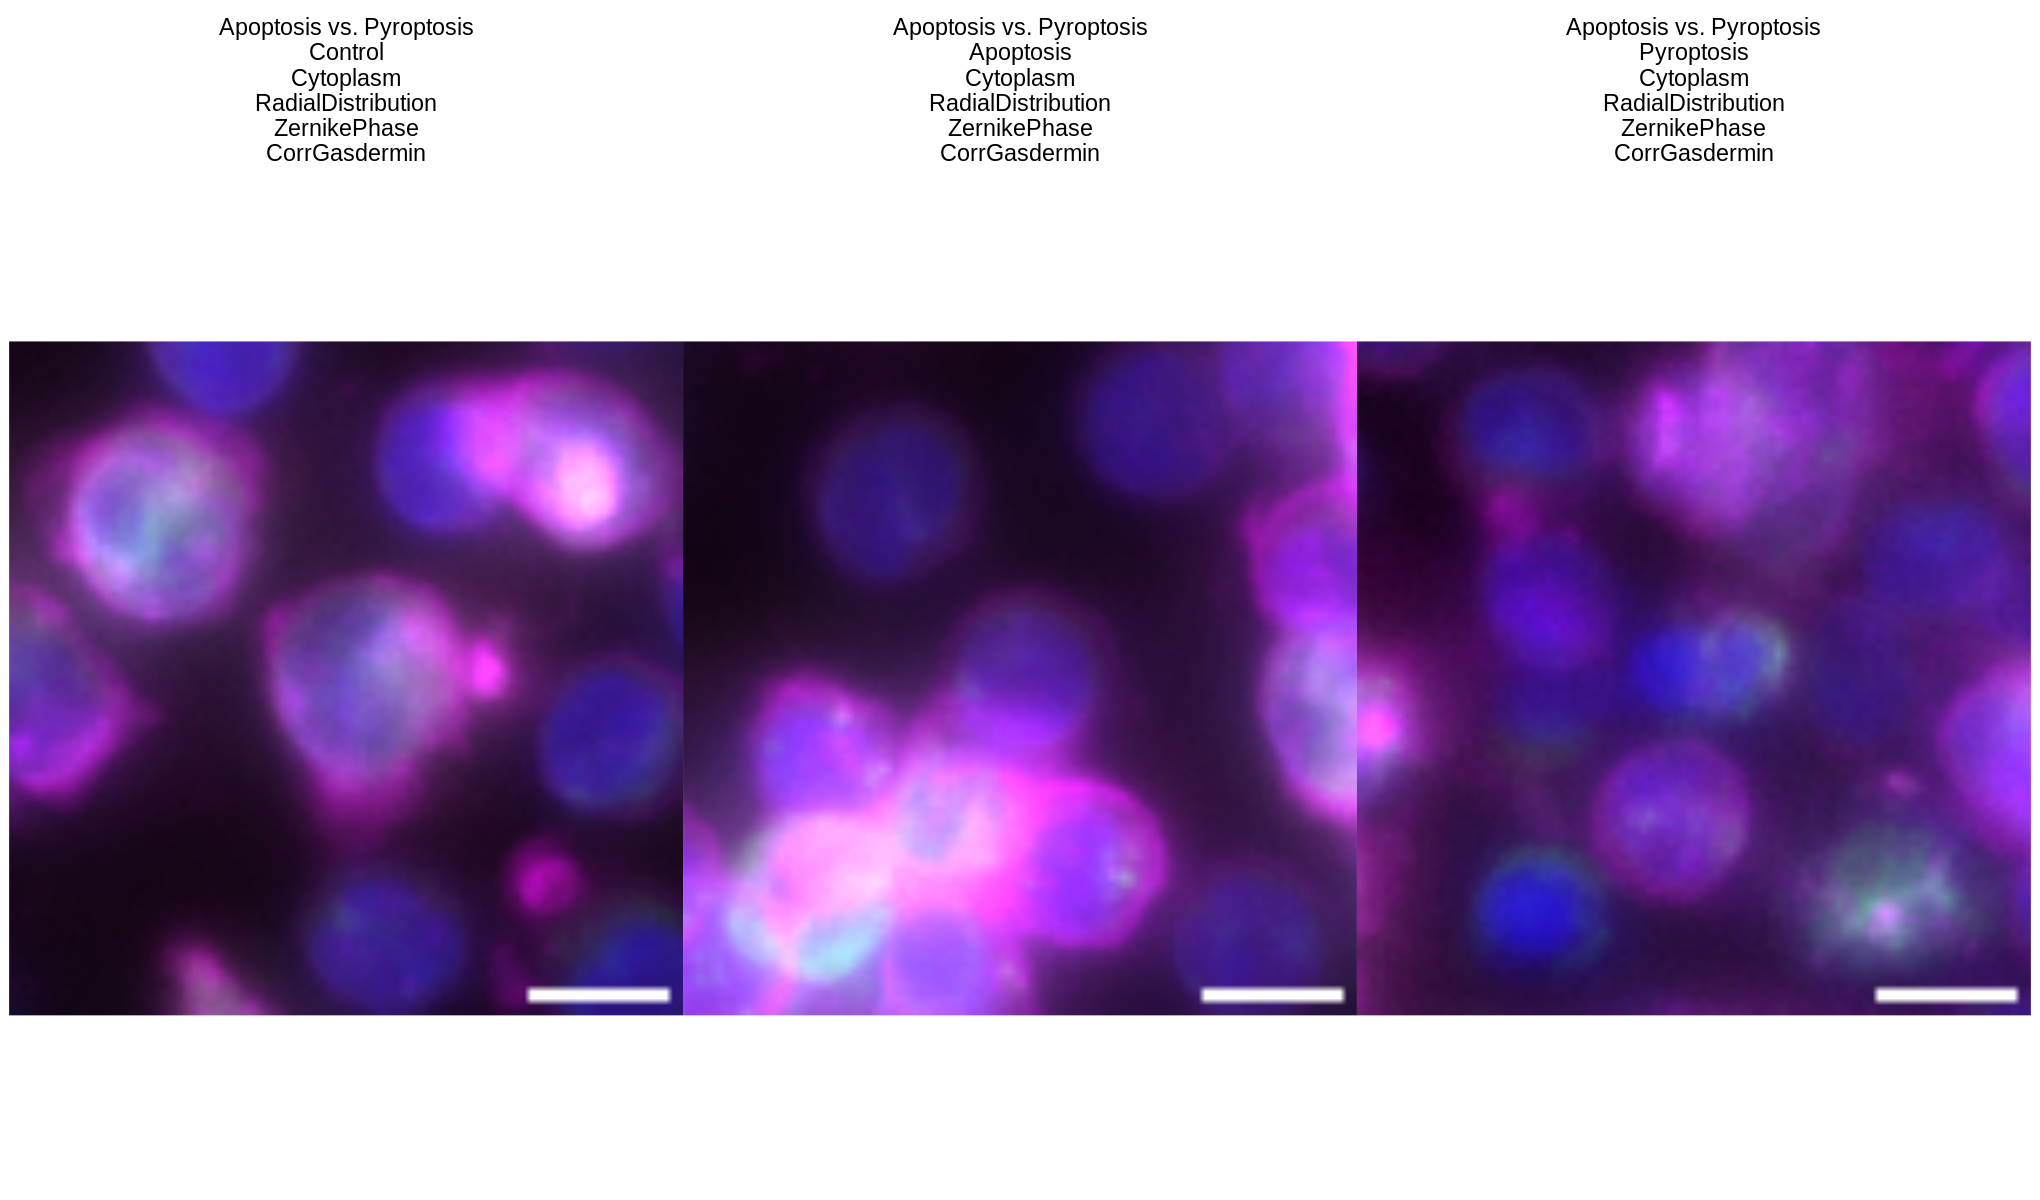

In [17]:
width <- 17
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
control_pyroptosis_images <- (
    # plot image with 
    ggplot_objects_apoptosis_pyroptosis[[6]]
    + ggplot_objects_apoptosis_pyroptosis[[10]]
    + ggplot_objects_apoptosis_pyroptosis[[15]]
   
    + plot_layout(ncol = 3)
)
control_pyroptosis_images
# save the image
ggsave(
    file.path(
        paste0(
            "../figures/",CELL_TYPE,"_anova_images_compisite.png"
        )
    ),
    control_pyroptosis_images, width = width, height = height, dpi = 600
)

In [18]:
# select rows to keep in the df by index
rows_to_keep = c(6,10,15)
apoptosis_pyroptosis <- apoptosis_pyroptosis[rows_to_keep,]

# # save the df
write.csv(apoptosis_pyroptosis, "../results/features_values.csv", row.names = FALSE)
head(apoptosis_pyroptosis)

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path,channel_cleaned,channel_learned
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1734.4812,1652.341,Control,1.654954,-1.757262,1.3543020,F10,7,135,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell_5.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell_5.png,CorrGasdermin,Gasdermin D
Thapsigargin_10.000_uM_DMSO_0.025_%,1334.9383,1242.408,Apoptosis,-0.735010,-1.757165,1.1990137,L06,5,69,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell_3.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution

Single channel + composite montage apooptosis vs pyroptosis


In [19]:
load_image <- function(path){
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()
    return(p)
}


In [20]:
control_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[1]
control_er_path <- apoptosis_pyroptosis$image_ER_crop_path[1]
control_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[1]
control_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[1]
control_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[1]
control_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[1]

apoptosis_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[2]
apoptosis_er_path <- apoptosis_pyroptosis$image_ER_crop_path[2]
apoptosis_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[2]
apoptosis_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[2]
apoptosis_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[2]
apoptosis_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[2]

pyroptosis_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[3]
pyroptosis_er_path <- apoptosis_pyroptosis$image_ER_crop_path[3]
pyroptosis_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[3]
pyroptosis_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[3]
pyroptosis_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[3]
pyroptosis_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[3]

# load images 
control_dapi_image <- load_image(control_dapi_image_path)
control_er_image <- load_image(control_er_path)
control_gasdermin_image <- load_image(control_gasdermin_path)
control_pm_image <- load_image(control_pm_path)
control_mito_image <- load_image(control_mito_path)

apoptosis_dapi_image <- load_image(apoptosis_dapi_image_path)
apoptosis_er_image <- load_image(apoptosis_er_path)
apoptosis_gasdermin_image <- load_image(apoptosis_gasdermin_path)
apoptosis_pm_image <- load_image(apoptosis_pm_path)
apoptosis_mito_image <- load_image(apoptosis_mito_path)

pyroptosis_dapi_image <- load_image(pyroptosis_dapi_image_path)
pyroptosis_er_image <- load_image(pyroptosis_er_path)
pyroptosis_gasdermin_image <- load_image(pyroptosis_gasdermin_path)
pyroptosis_pm_image <- load_image(pyroptosis_pm_path)
pyroptosis_mito_image <- load_image(pyroptosis_mito_path)

control_composite_image <- load_image(control_composite_path)
apoptosis_composite_image <- load_image(apoptosis_composite_path)
pyroptosis_composite_image <- load_image(pyroptosis_composite_path)

# list of images
list_of_images <- list(
    control_dapi_image,
    control_er_image,
    control_gasdermin_image,
    control_pm_image,
    control_mito_image,
    control_composite_image,


    apoptosis_dapi_image,
    apoptosis_er_image,
    apoptosis_gasdermin_image,
    apoptosis_pm_image,
    apoptosis_mito_image,
    apoptosis_composite_image,

    pyroptosis_dapi_image,
    pyroptosis_er_image,
    pyroptosis_gasdermin_image,
    pyroptosis_pm_image,
    pyroptosis_mito_image,
    pyroptosis_composite_image
)



In [21]:
# import morphology data 
columns_to_import <- c("oneb_Metadata_Treatment_Dose_Inhibitor_Dose", "Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1")
# path to the parquet file
morphology_path <- file.path(
    "..","..","..","data","PBMC_preprocessed_sc_norm.parquet"
)

# read in the parquet file with certain columns
morphology_df <- arrow::read_parquet(morphology_path, col_select = all_of(columns_to_import))

control_value <- apoptosis_pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[1]
apoptosis_value <- apoptosis_pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[2]
pyroptosis_value <- apoptosis_pyroptosis$Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1[3]


In [22]:
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_0.100_ug_per_ml_DMSO_0.000_%", "Flagellin_0.100_ug_per_ml_DMSO_0.025_%", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "media_ctr_0.0_0_Media_0_0", "media_ctr_0.0_0_Media_ctr_0.0_0", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.000_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_0_Disulfiram_1.000_uM", "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.000_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_0_DMSO_0.025_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)


length(unique(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose))
unique(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

[1] 38

[1] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                            
 [2] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                            
 [3] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"       
 [4] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"       
 [5] "DMSO_0.100_%_DMSO_0.025_%"                                   
 [6] "media_ctr_0.0_0_Media_ctr_0.0_0"                             
 [7] "DMSO_0.100_%_DMSO_1.000_%"                                   
 [8] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                            
 [9] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                           
[10] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"      
[11] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
[12] "Thapsigargin_1.000_uM_DMSO_0.025_%"                          
[13] "Thapsigargin_10.000_uM_DMSO_0.025_%"                         
[14] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"                           
[15] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
[16] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                    
[17] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                    
[18] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
[19] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
[20] "Topotecan_5.000_nM_DMSO_0.025_%"                             
[21] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[22] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                    
[23] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[24] "H2O2_100.000_nM_DMSO_0.025_%"                                
[25] "H2O2_100.000_uM_DMSO_0.025_%"                                
[26] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[27] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                          
[28] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"         
[29] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[30] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[31] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"         
[32] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"        
[33] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
[34] "Flagellin_1.000_ug_per_ml_DMSO_0.0_%"                        
[35] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                      
[36] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM" 
[37] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
[38] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"

In [23]:
# read in the ground truth data
data_path_ground_truth <- file.path("../../../4.sc_Morphology_Neural_Network_MLP_Model/MLP_utils/ground_truth.toml")
ground_truth <- parseTOML(data_path_ground_truth)
# make a a list of the treatments that are in the ground truth data
apoptosis_ground_truth_list <- c(ground_truth$Apoptosis$apoptosis_groups_list)
pyroptosis_ground_truth_list <- c(ground_truth$Pyroptosis$pyroptosis_groups_list)
control_ground_truth_list <- c(ground_truth$Healthy$healthy_groups_list)

pyroptosis_ground_truth_list
control_ground_truth_list
# make a new column that is the treatment group based on the ground truth data
morphology_df$group <- ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% apoptosis_ground_truth_list, "Apoptosis",
                                ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% pyroptosis_ground_truth_list, "Pyroptosis",
                                       ifelse(morphology_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% control_ground_truth_list, "Control", "NA")))
# make the group column a factor
morphology_df$group <- factor(morphology_df$group, levels = c("Control","Apoptosis", "Pyroptosis"))

unique(morphology_df$group)


[1] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                     
 [2] "Flagellin_1.000_ug_per_ml_DMSO_0.0_%"                       
 [3] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"              
 [4] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                           
 [5] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                           
 [6] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                           
 [7] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                          
 [8] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                   
 [9] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                   
[10] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                   
[11] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                         
[12] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"        
[13] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"       
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM"
[15] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"        
[16] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"      
[17] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"     
[18] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"

[1] "DMSO_0.100_%_DMSO_0.025_%"                                   
 [2] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
 [3] "DMSO_0.100_%_DMSO_1.000_%"                                   
 [4] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"                           
 [5] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
 [6] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
 [7] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
 [8] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
 [9] "H2O2_100.000_nM_DMSO_0.025_%"                                
[10] "H2O2_100.000_uM_DMSO_0.025_%"                                
[11] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[12] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[13] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
[15] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[16] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[17] "Topotecan_5.000_nM_DMSO_0.025_%"                             
[18] "media_ctr_0.0_0_Media_0.0_0"                                 
[19] "media_ctr_0.0_0_Media_ctr_0.0_0"

[1] Pyroptosis Control    Apoptosis 
Levels: Control Apoptosis Pyroptosis

In [24]:
head(morphology_df)
# get only rows that contain the control or apoptosis or pyroptosis
control_df <- morphology_df %>% filter(group == "Control")
apoptosis_df <- morphology_df %>% filter(group == "Apoptosis")
pyroptosis_df <- morphology_df %>% filter(group == "Pyroptosis")

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,group
<chr>,<dbl>,<fct>
LPS_0.010_ug_per_ml_DMSO_0.025_%,1.4920698,Pyroptosis
LPS_0.010_ug_per_ml_DMSO_0.025_%,0.8715299,Pyroptosis
LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.7502727,Pyroptosis
LPS_0.010_ug_per_ml_DMSO_0.025_%,1.1844743,Pyroptosis
LPS_0.010_ug_per_ml_DMSO_0.025_%,1.6306142,Pyroptosis
LPS_0.010_ug_per_ml_DMSO_0.025_%,0.5618248,Pyroptosis


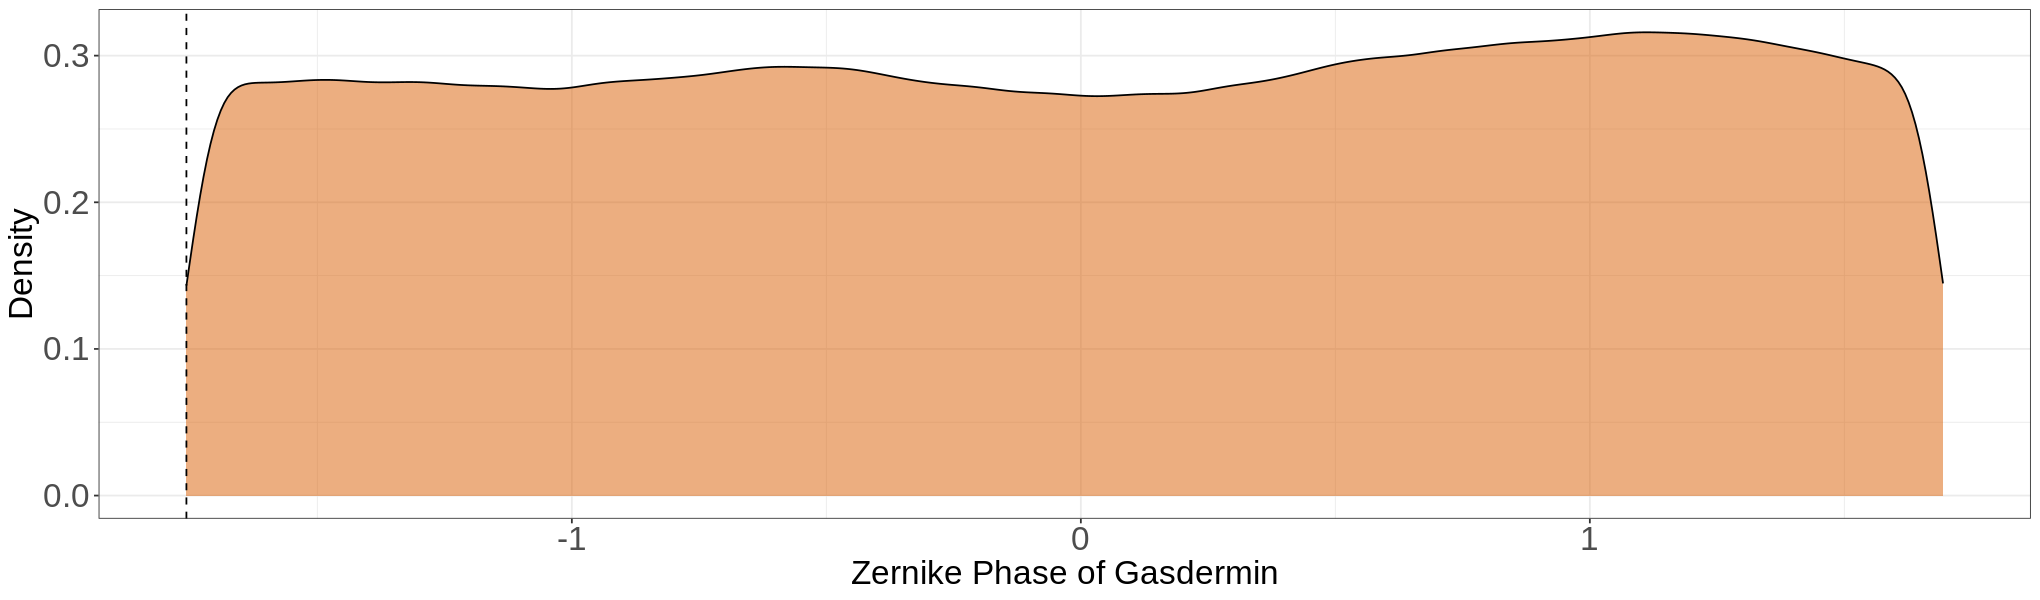

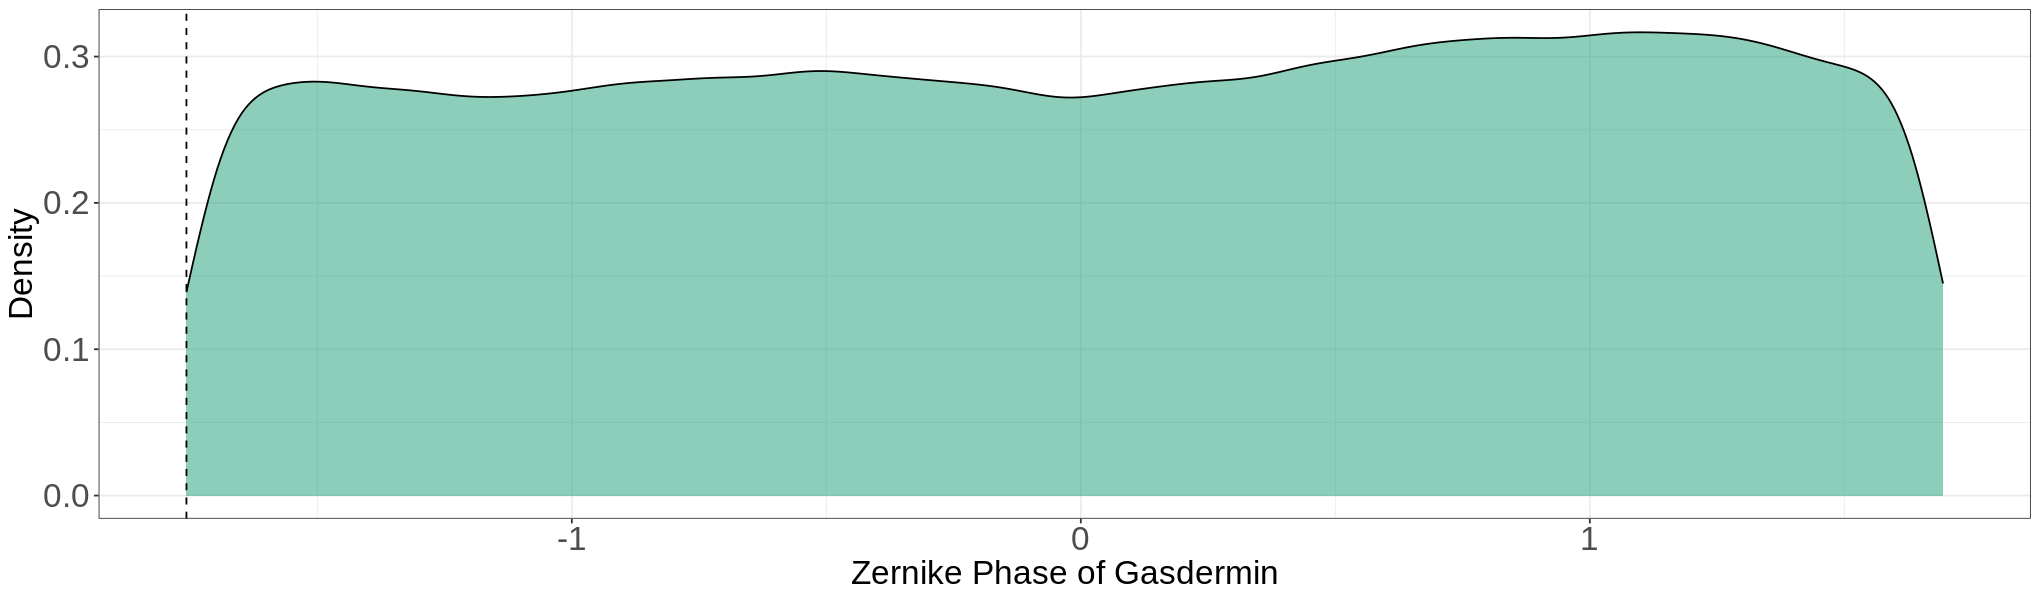

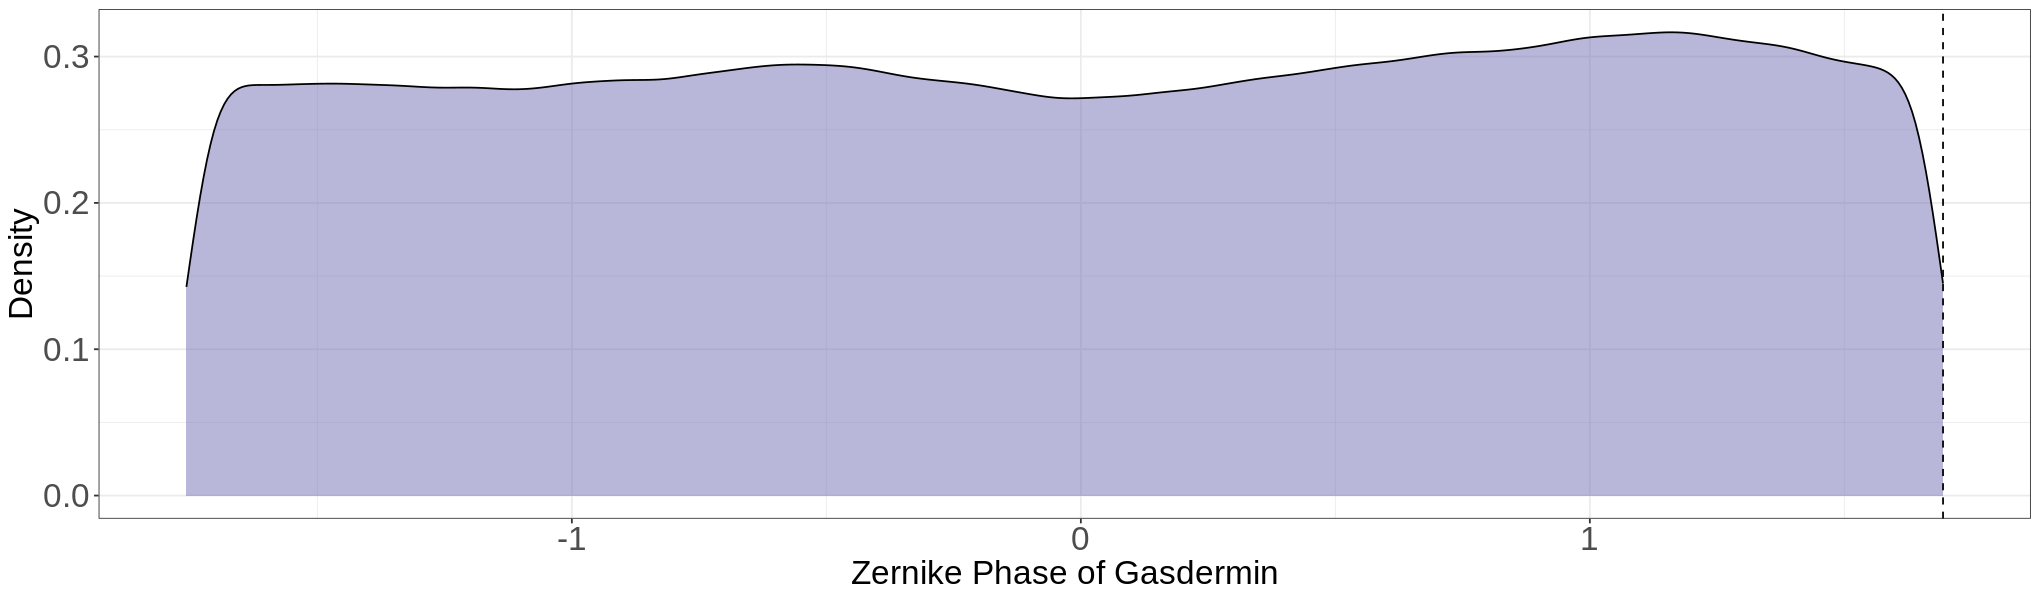

In [25]:
width <- 17
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
# histogram of the zernike phase correlation of gasdermin 9_1
hist_plot_control <- (
    ggplot(control_df, aes(x = Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1))
    + geom_density(aes(fill = group), alpha = 0.5)
    # change color of the fill
    + scale_fill_manual(values = brewer.pal(3, "Dark2")[2])
    + figure_theme
    + labs(
        x = "Zernike Phase of Gasdermin",
        y = "Density",
    )
    # add verticle line per facet 
    + geom_vline(
        aes(xintercept = control_value),
        color = "black",
        linetype = "dashed",

    )
)

hist_plot_apoptosis <- (
    ggplot(apoptosis_df, aes(x = Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1))
    + geom_density(aes(fill = group), alpha = 0.5)
    # change color of the fill
    + scale_fill_manual(values = brewer.pal(3, "Dark2")[1])
    + figure_theme
    + labs(
        x = "Zernike Phase of Gasdermin",
        y = "Density",
    )
    # add verticle line per facet 
    + geom_vline(
        aes(xintercept = apoptosis_value),
        color = "black",
        linetype = "dashed",

    )
)

hist_plot_pyroptosis <- (
    ggplot(pyroptosis_df, aes(x = Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1))
    + geom_density(aes(fill = group), alpha = 0.5)
    # change color of the fill
    + scale_fill_manual(values = brewer.pal(3, "Dark2")[3])
    + figure_theme
    + labs(
        x = "Zernike Phase of Gasdermin",
        y = "Density",
    )
    # add verticle line per facet 
    + geom_vline(
        aes(xintercept = pyroptosis_value),
        color = "black",
        linetype = "dashed",

    )
)

# remove the legend
hist_plot_control <- hist_plot_control + theme(legend.position = "none")
hist_plot_apoptosis <- hist_plot_apoptosis + theme(legend.position = "none")
hist_plot_pyroptosis <- hist_plot_pyroptosis + theme(legend.position = "none")

hist_plot_control
hist_plot_apoptosis
hist_plot_pyroptosis

In [26]:
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# blank
blank <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = ""), size = text_size) 
    + theme_void()
)

# ggplot of just text
control_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Control"), size = text_size) 
    + theme_void()
)
apoptosis_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Apoptosis"), size = text_size) 
    + theme_void()
)
pyroptosis_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Pyroptosis"), size = text_size) 
    + theme_void()
)

In [27]:
# patchwork the images together
width <- 17
height <- 5

options(repr.plot.width = width, repr.plot.height = height)

# stich the images together
control_images <- (
    # plot image with 
    control_text
    + list_of_images[[1]]
    + list_of_images[[2]]
    + list_of_images[[3]]
    + list_of_images[[4]]
    + list_of_images[[5]]
    + list_of_images[[6]]
    + plot_layout(nrow = 1)
)
apotosis_images <- (
    # plot image with 
    apoptosis_text
    + list_of_images[[7]]
    + list_of_images[[8]]
    + list_of_images[[9]]
    + list_of_images[[10]]
    + list_of_images[[11]]
    + list_of_images[[12]]
    + plot_layout(nrow = 1)
)
pyroptosis_images <- (
    # plot image with 
    control_text
    + list_of_images[[13]]
    + list_of_images[[14]]
    + list_of_images[[15]]
    + list_of_images[[16]]
    + list_of_images[[17]]
    + list_of_images[[18]]
    + plot_layout(nrow = 1)
)




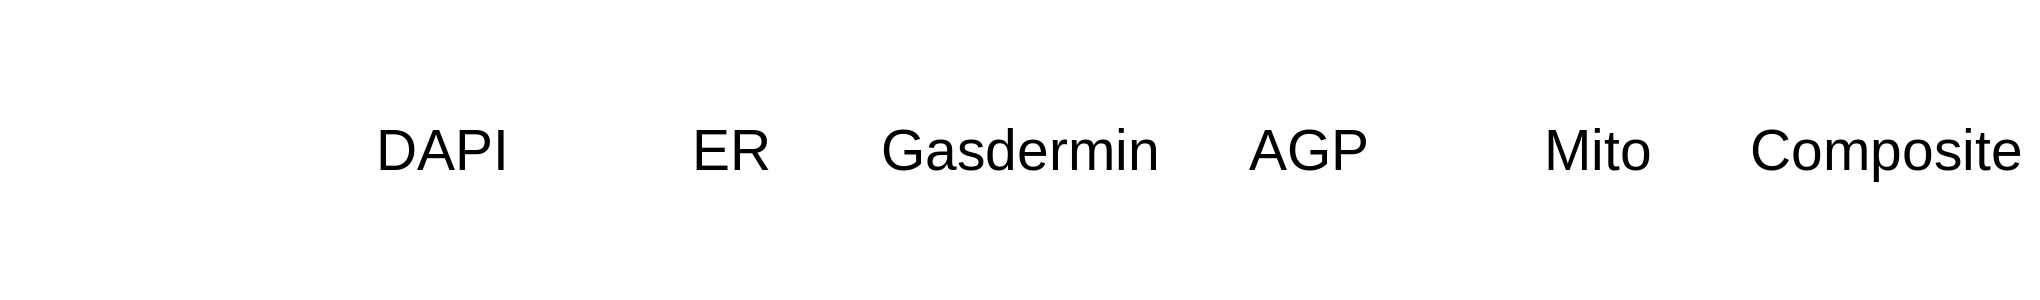

In [28]:
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# ggplot of just text
dapi_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "DAPI"), size = text_size) 
    + theme_void()
)
er_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "ER"), size = text_size) 
    + theme_void()
)
Gasdermin_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Gasdermin"), size = text_size) 
    + theme_void()
)
pm_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "AGP"), size = text_size) 
    + theme_void()
)
mito_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Mito"), size = text_size) 
    + theme_void()
)
composite_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Composite"), size = text_size) 
    + theme_void()
)


# patch text together
patch_text <- (
    blank
    + dapi_text
    + er_text
    + Gasdermin_text
    + pm_text
    + mito_text
    + composite_text
    + plot_layout(nrow = 1)
)
width <- 17
height <- 2.5

options(repr.plot.width = width, repr.plot.height = height)


patch_text

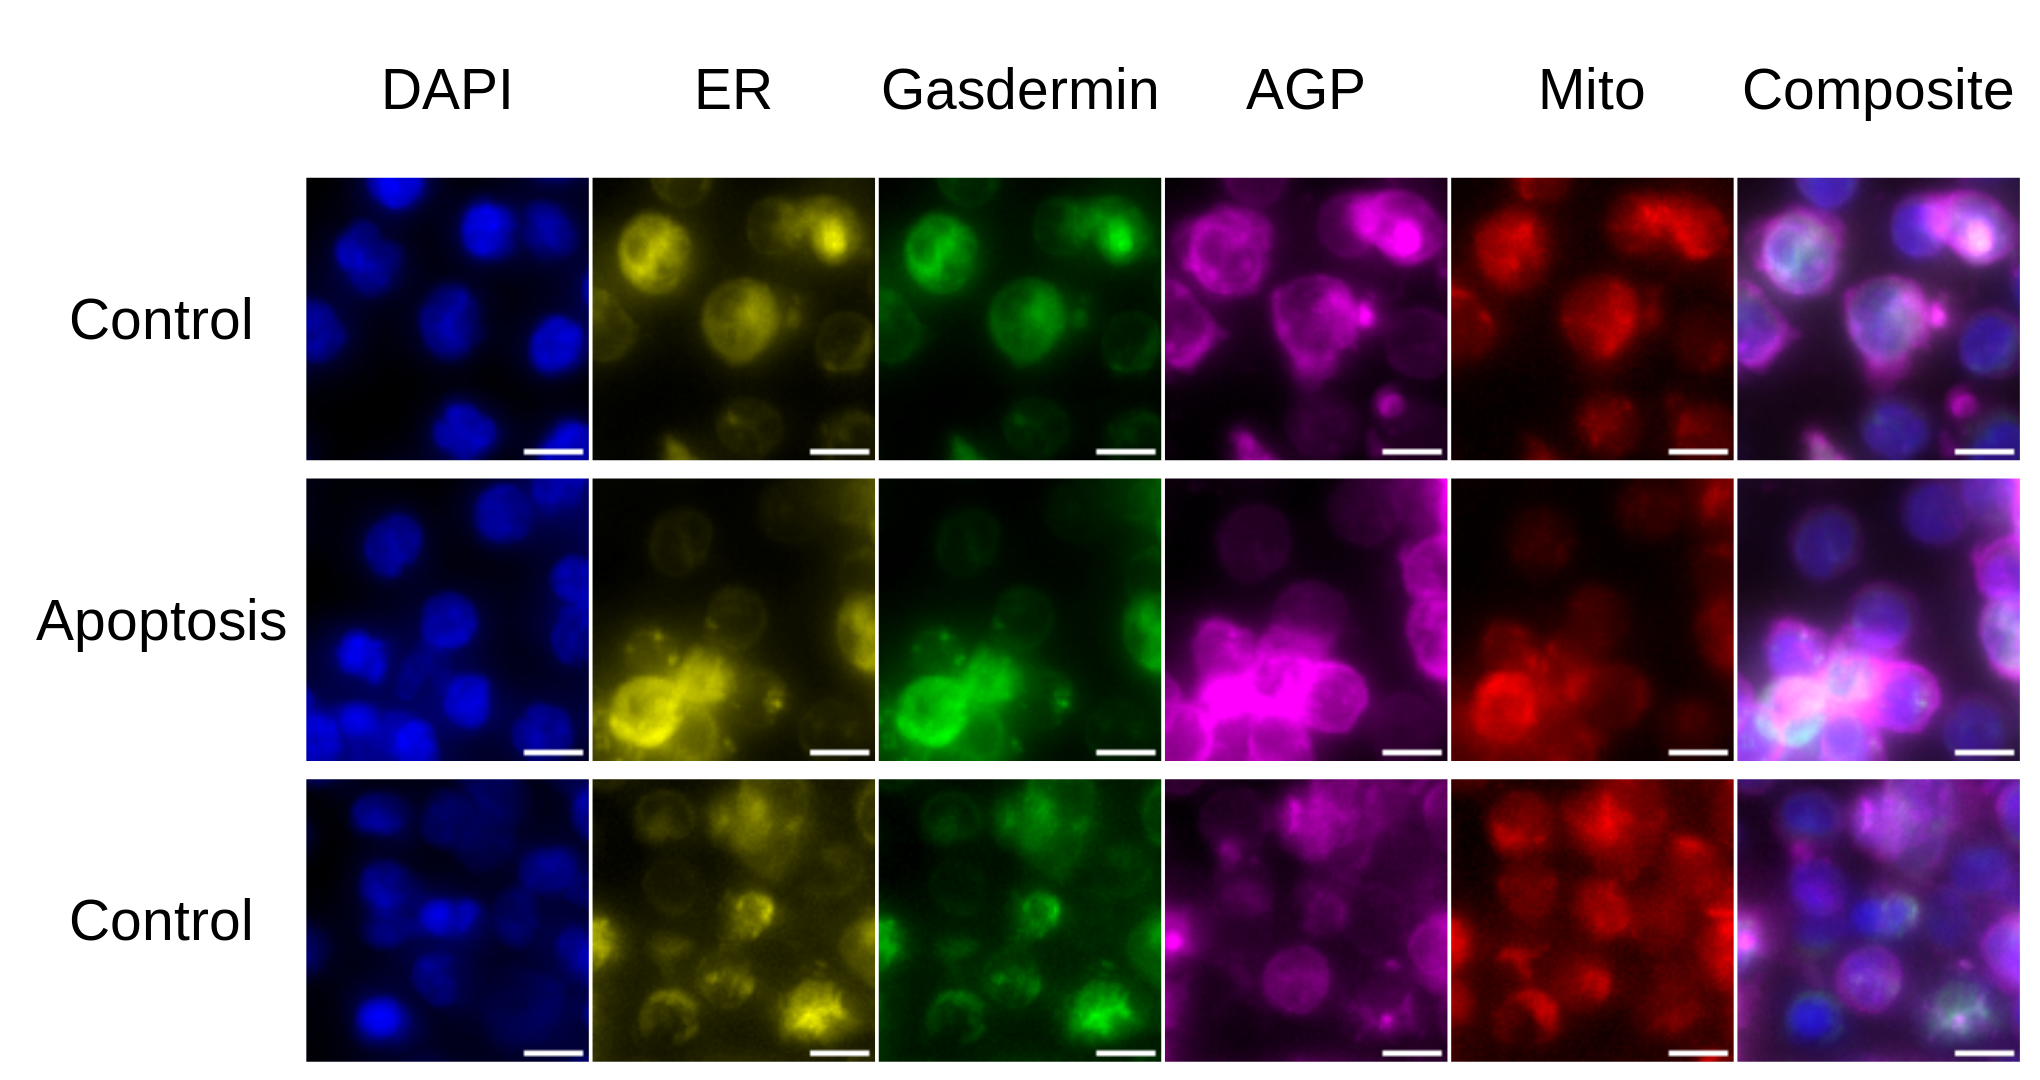

In [29]:
width <- 17
height <- 9

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
all_plot <- (
    wrap_elements(full = patch_text)
    + wrap_elements(full = control_images)
    + wrap_elements(full = apotosis_images)
    + wrap_elements(full = pyroptosis_images)
    + plot_layout(ncol = 1, widths = c(1, 1, 1, 1), heights = c(0.2, 0.4, 0.4, 0.4))
    )
all_plot

# save plot
ggsave(
    file.path(
        paste0(
            "../figures/",CELL_TYPE,"_montage.png"
        )
    ),
    all_plot, width = width, height = height, dpi = 600
)